In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

get_font_family()

font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)
# ggplot으로 그래프 스타일 설정
plt.style.use('ggplot')
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

df = pd.read_excel('./data/closet_share.xlsx', engine='openpyxl')
df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y


* p_type : 대여일 (4일/7일)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   USER        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1295 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


In [4]:
df.describe()

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
count,1442,1471,1471,1466,1471,1471,1471,1295
unique,245,979,1234,368,90,2,6,1
top,Gucci,chevron quilted cross bag black,a1149461,2021-03-16 00:00:00,2021-03-24 00:00:00,4days,BA,Y
freq,232,23,11,44,47,894,692,1295
first,NaN,NaN,NaN,2017-06-24 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-03-31 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN


In [5]:
df['sub_type'].unique()

array(['BA', 'O', 'B', 'T', 'D', 'TP'], dtype=object)

* O : 아우터
* T : 상의
* B : 하의
* TP : 투피스
* D : 드레스
* BA : 가방

In [6]:
sub_type = {'O':'아우터', 'T':'상의', 'B':'하의', 'TP':'투피스', 'D':'드레스', 'BA':'가방'}

In [7]:
df[df['brandnm'].isnull()]

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
146,NaN,feminine military blouse & high waist wide slacks,a1144948,2021-01-30,2021-01-30,4days,TP,Y
147,NaN,button basic pattern doublebreasted-jacket sky...,a170041,2020-01-01,2021-01-30,4days,TP,Y
160,NaN,lace point shirring blouse pink & lace detail ...,a1141009,2021-01-04,2021-01-28,4days,TP,Y
220,NaN,printing pattern hoodie grey & pocket basic pa...,a1144470,2021-01-25,2021-01-26,4days,TP,Y
267,NaN,button basic pattern jacket black & pocket bas...,a121913,2019-05-05,2021-01-21,4days,TP,Y
282,NaN,buckle shirt & embroidery lace skirt charcoal,a1132297,2020-11-22,2021-01-21,7days,TP,Y
285,NaN,button tweed pattern doublebreasted-coat multi...,a1127979,2020-10-31,2021-01-21,7days,TP,Y
329,NaN,long sleeve rib t-shirt & check pattern square...,a1134915,2020-12-03,2021-01-19,7days,TP,NaN
342,NaN,cutout neck knit & color pleats belt skirt,a1141257,2021-01-05,2021-01-19,4days,TP,Y
368,NaN,El estilo de Claire - neoprene botanical print...,a1107090,2020-07-03,2021-01-17,4days,TP,Y


In [8]:
df.iloc[[267],:]['goodsnm'].values

array(['button basic pattern jacket black & pocket basic pattern slacks black'],
      dtype=object)

In [9]:
print(df['brandnm'].unique().shape)
print(df['brandnm'].unique())

(246,)
['Gucci' 'El estilo de Claire' 'Danha' 'Burberry London' 'Prada'
 'Max Mara' 'Molliolli' 'Sandro' 'Louis Vuitton' 'Tory Burch' 'Chloe'
 'Time' 'The Izzat' 'Mojosphine' 'Ted Baker' '& Other Stories' 'Fendi'
 'Balmain' 'Celine' 'Burberry' 'Chanel' 'Dior' 'Bottega Veneta'
 'Plastic Island' 'Reneevon' 'Sorry Too Much Love' 'Saint Laurent'
 'Miu Miu' 'Yves Saint Laurent' 'Zooc' 'Vivienne Westwood'
 'Maison Kitsune' 'Margarin fingers' 'The Tint' 'Love Moschino' 'Michaa'
 'Vivienne Westwood Red Label' 'MSGM' 'Christian Dior' 'It michaa' 'SJSJ'
 'Amsale' 'Imvely' 'Chi Chi London' 'Maje' 'Biker Starlet' 'Thom Browne'
 'Jill By Jill Stuart' 'Comme des Garcons' 'Nain' 'Dolce & Gabbana'
 'Givenchy' 'Salvatore Ferragamo' 'Andersen-Andersen' 'A.P.C.'
 'Self-portrait' 'Sonia Rykiel' 'Diane von Furstenberg' 'Hugo Boss'
 'Baum Und Pferdgarten' 'BCBG' 'Lmml Studio' 'Nike' 'Not Your Rose' nan
 'Jigott' 'Escada' 'Diagonal' 'System' 'On&On' 'Lucky Chouette'
 'The Clozet' 'Allen.O' 'Vunque' 'Jill Stu

In [10]:
df[df['sub_type']=='TP']

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
146,NaN,feminine military blouse & high waist wide slacks,a1144948,2021-01-30,2021-01-30,4days,TP,Y
147,NaN,button basic pattern doublebreasted-jacket sky...,a170041,2020-01-01,2021-01-30,4days,TP,Y
160,NaN,lace point shirring blouse pink & lace detail ...,a1141009,2021-01-04,2021-01-28,4days,TP,Y
220,NaN,printing pattern hoodie grey & pocket basic pa...,a1144470,2021-01-25,2021-01-26,4days,TP,Y
267,NaN,button basic pattern jacket black & pocket bas...,a121913,2019-05-05,2021-01-21,4days,TP,Y
282,NaN,buckle shirt & embroidery lace skirt charcoal,a1132297,2020-11-22,2021-01-21,7days,TP,Y
285,NaN,button tweed pattern doublebreasted-coat multi...,a1127979,2020-10-31,2021-01-21,7days,TP,Y
329,NaN,long sleeve rib t-shirt & check pattern square...,a1134915,2020-12-03,2021-01-19,7days,TP,NaN
342,NaN,cutout neck knit & color pleats belt skirt,a1141257,2021-01-05,2021-01-19,4days,TP,Y
368,NaN,El estilo de Claire - neoprene botanical print...,a1107090,2020-07-03,2021-01-17,4days,TP,Y


## 날짜 feature type 변경

In [11]:
df['reg_date'] = pd.to_datetime(df['reg_date'])
df['order_date'] = pd.to_datetime(df['order_date'])

## p_type

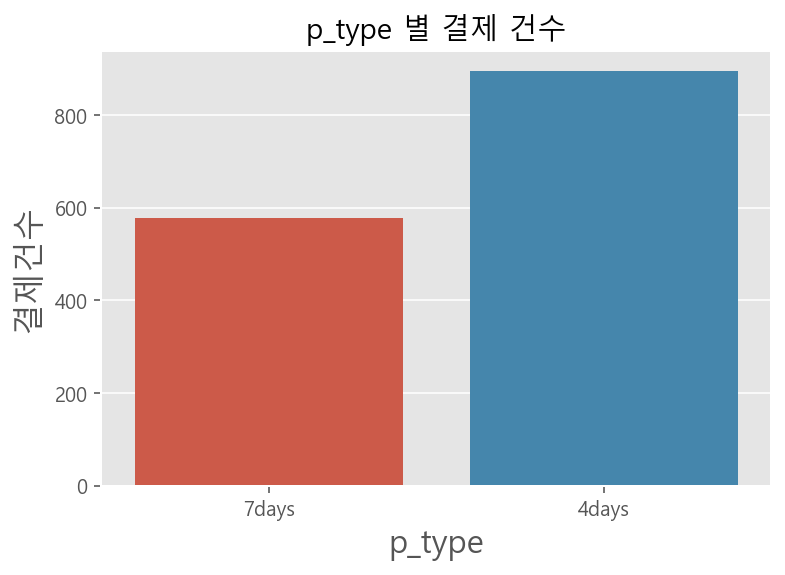

In [12]:
sns.countplot(data=df, x='p_type')
plt.xlabel('p_type',fontsize=16)
plt.ylabel('결제건수', fontsize=16)
plt.title('p_type 별 결제 건수')
plt.show()

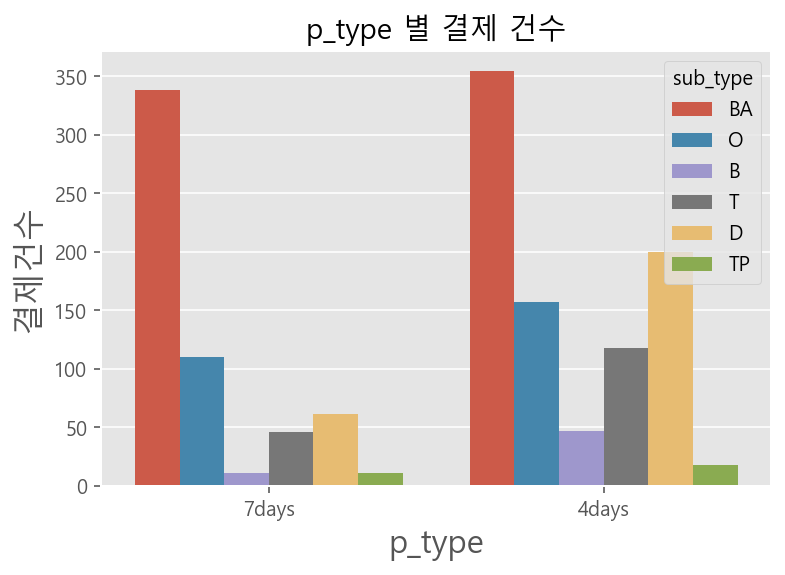

In [13]:
sns.countplot(data=df, x='p_type', hue='sub_type')
plt.xlabel('p_type',fontsize=16)
plt.ylabel('결제건수', fontsize=16)
plt.title('p_type 별 결제 건수')
plt.show()

## sub_type

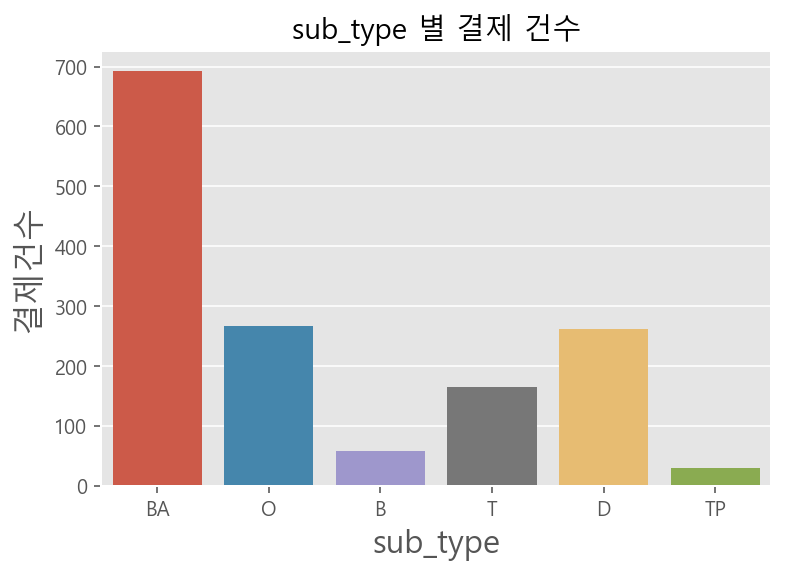

In [14]:
sns.countplot(data=df, x='sub_type')
plt.xlabel('sub_type',fontsize=16)
plt.ylabel('결제건수', fontsize=16)
plt.title('sub_type 별 결제 건수')
plt.show()

In [70]:
df.groupby(['sub_type']).count()['goodsnm']

sub_type
B      58
BA    692
D     261
O     267
T     164
TP     29
Name: goodsnm, dtype: int64

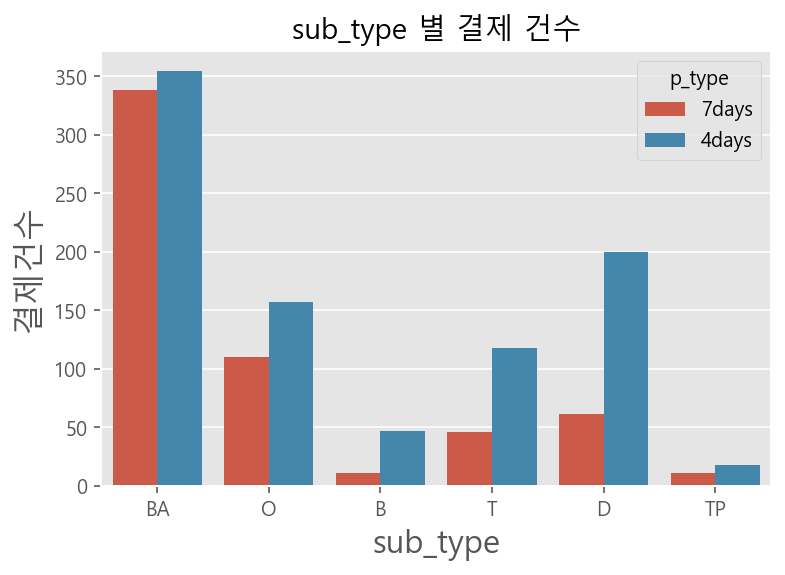

In [15]:
sns.countplot(data=df, x='sub_type', hue='p_type')
plt.xlabel('sub_type',fontsize=16)
plt.ylabel('결제건수', fontsize=16)
plt.title('sub_type 별 결제 건수')
plt.show()

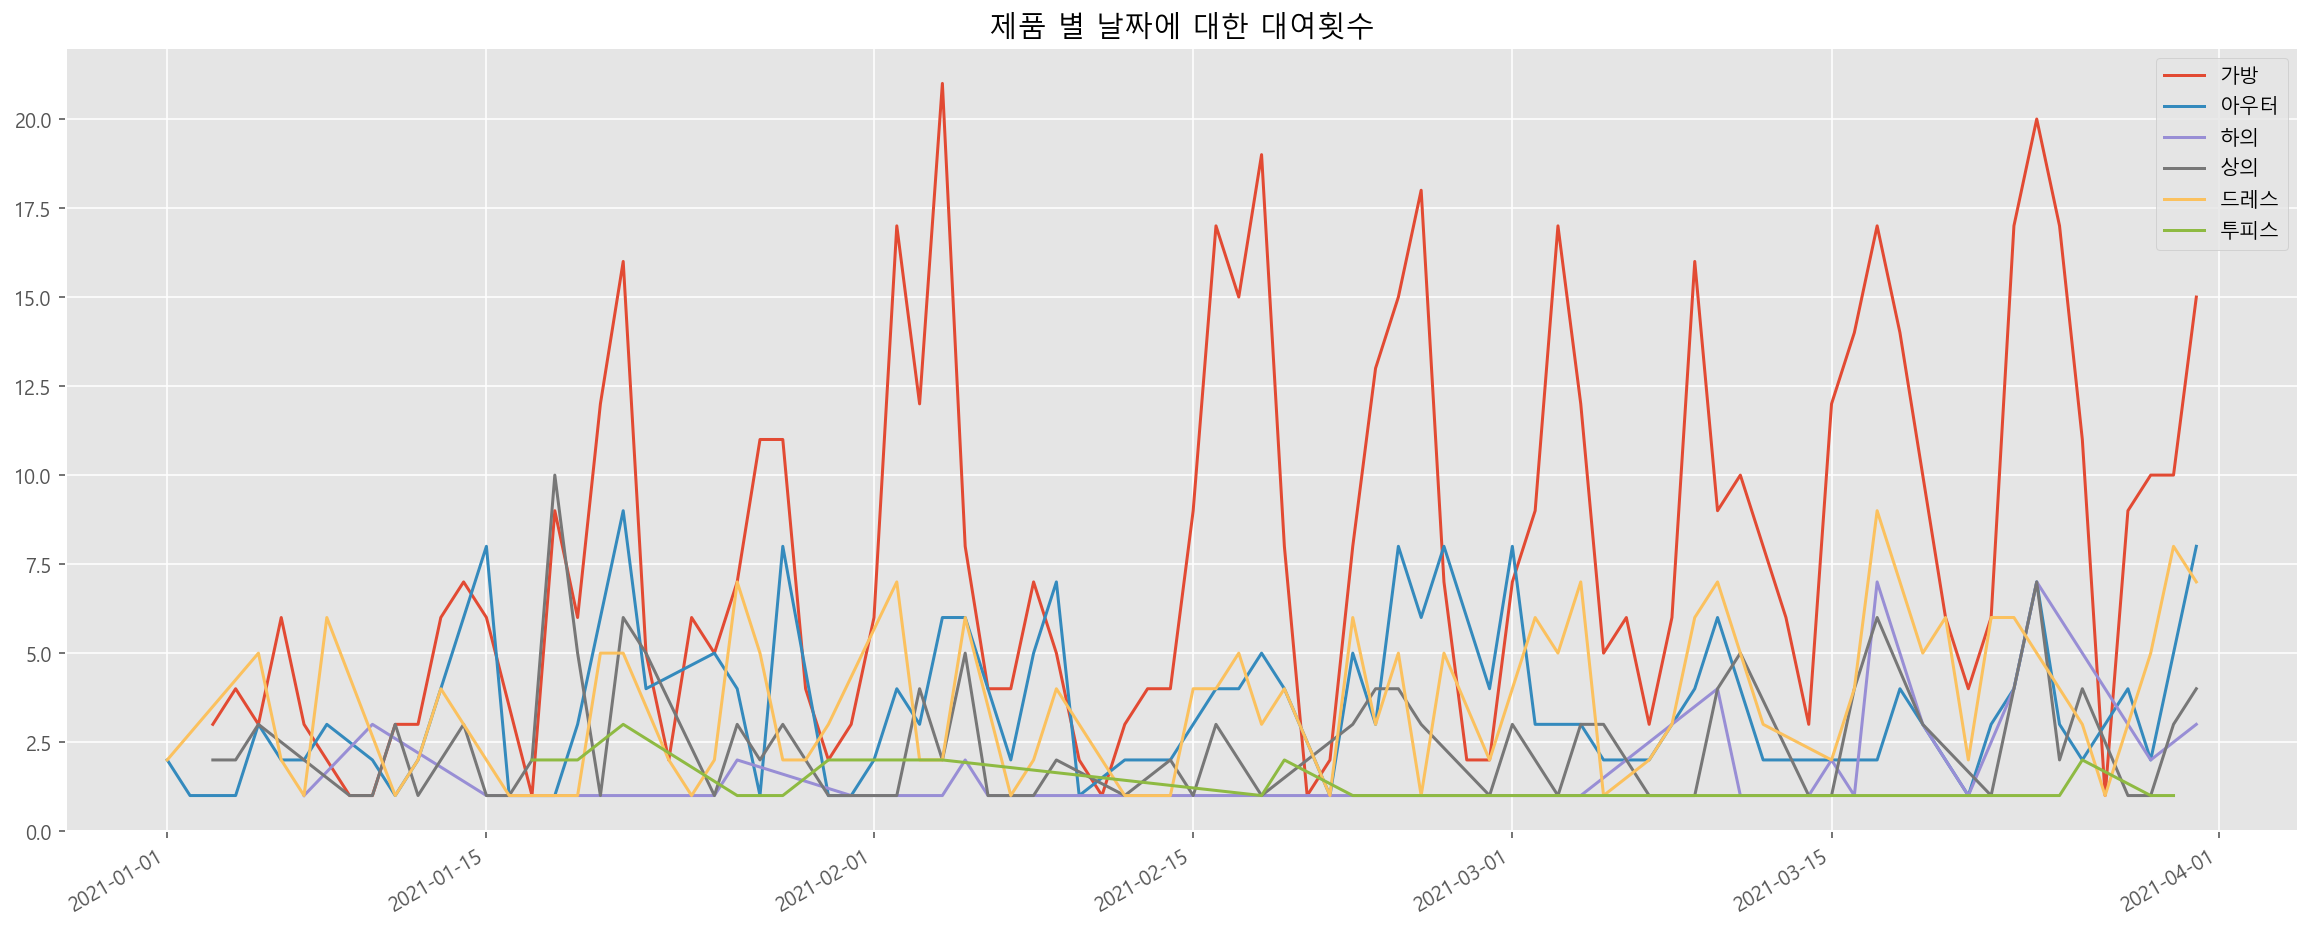

In [16]:
df_ba = df[df['sub_type'] =='BA']
df_o = df[df['sub_type'] =='O']
df_b = df[df['sub_type'] =='B']
df_t = df[df['sub_type'] =='T']
df_d = df[df['sub_type'] =='D']
df_tp = df[df['sub_type'] =='TP']
plt.figure(figsize=(20,8))
df_ba['order_date'].value_counts().plot(label='가방')
df_o['order_date'].value_counts().plot(label='아우터')
df_b['order_date'].value_counts().plot(label='하의')
df_t['order_date'].value_counts().plot(label='상의')
df_d['order_date'].value_counts().plot(label='드레스')
df_tp['order_date'].value_counts().plot(label='투피스')
plt.legend()
plt.title('제품 별 날짜에 대한 대여횟수')
plt.show()

* 중간 중간 뚝뚝 떨어지는 이유는 인기상품이 대여중이기 때문일까 아니면 충성고객이 대여중이기 때문일까

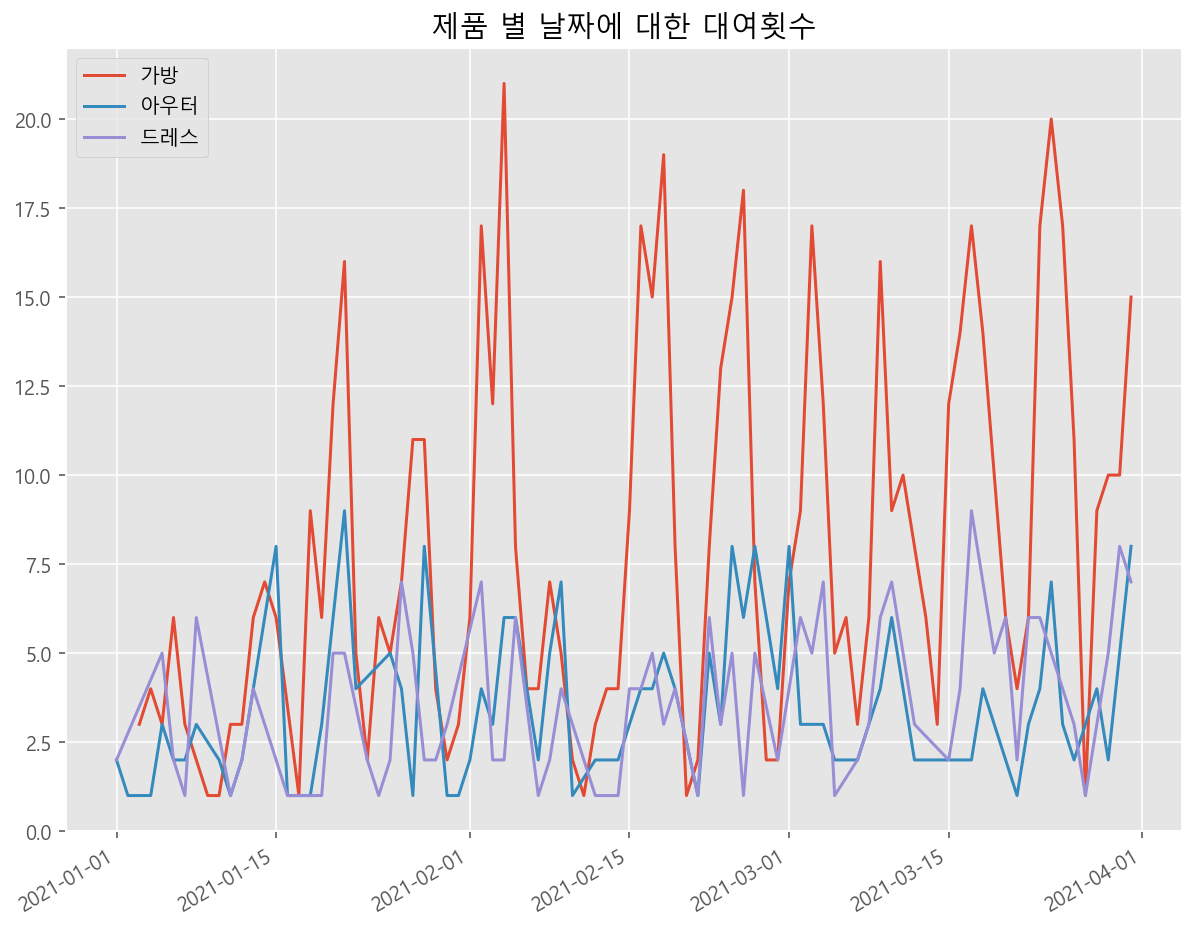

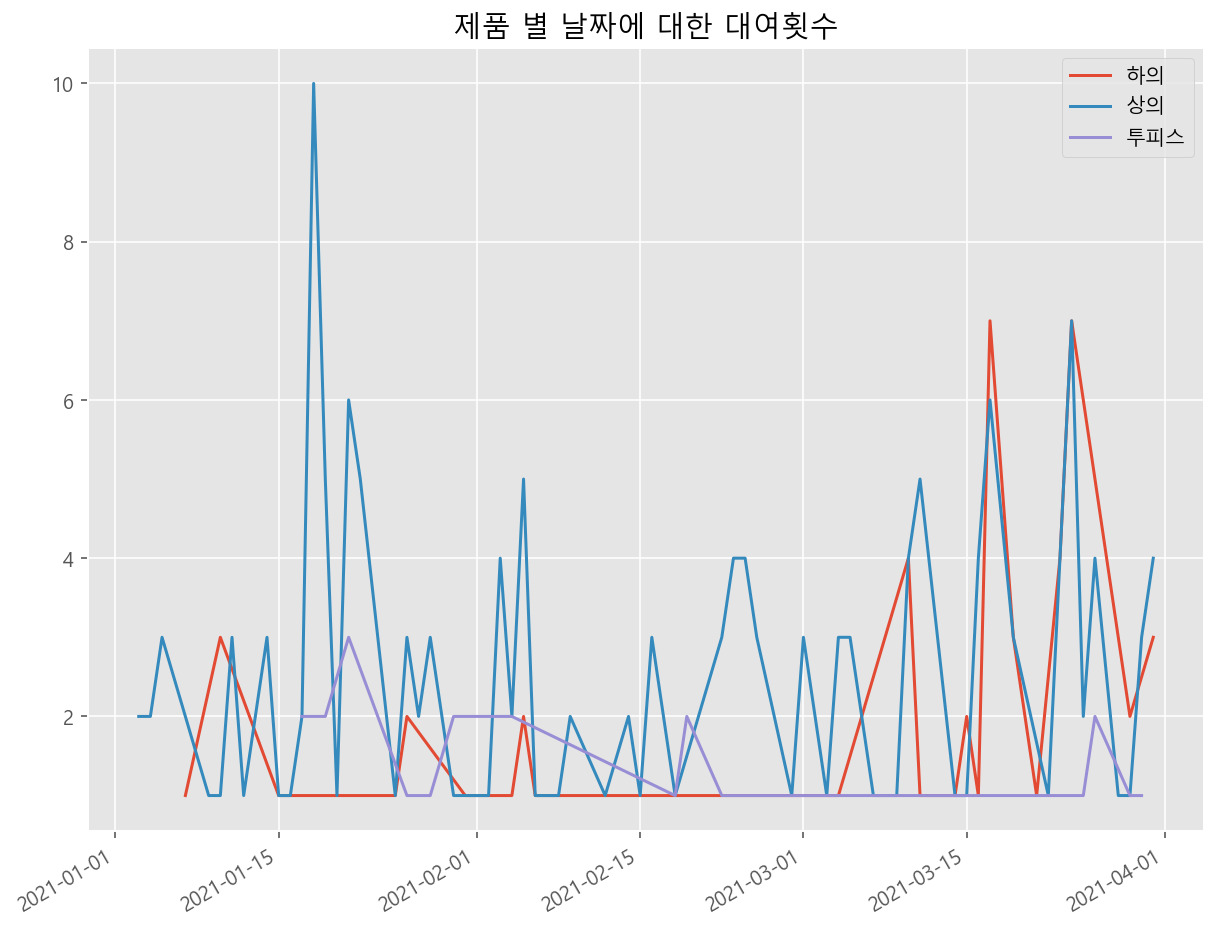

In [72]:
plt.figure(figsize=(10,8))
df_ba['order_date'].value_counts().plot(label='가방')
df_o['order_date'].value_counts().plot(label='아우터')
df_d['order_date'].value_counts().plot(label='드레스')
plt.legend()
plt.title('제품 별 날짜에 대한 대여횟수')
plt.show()

plt.figure(figsize=(10,8))
df_b['order_date'].value_counts().plot(label='하의')
df_t['order_date'].value_counts().plot(label='상의')
df_tp['order_date'].value_counts().plot(label='투피스')
plt.legend()
plt.title('제품 별 날짜에 대한 대여횟수')
plt.show()

## 날짜별 건수

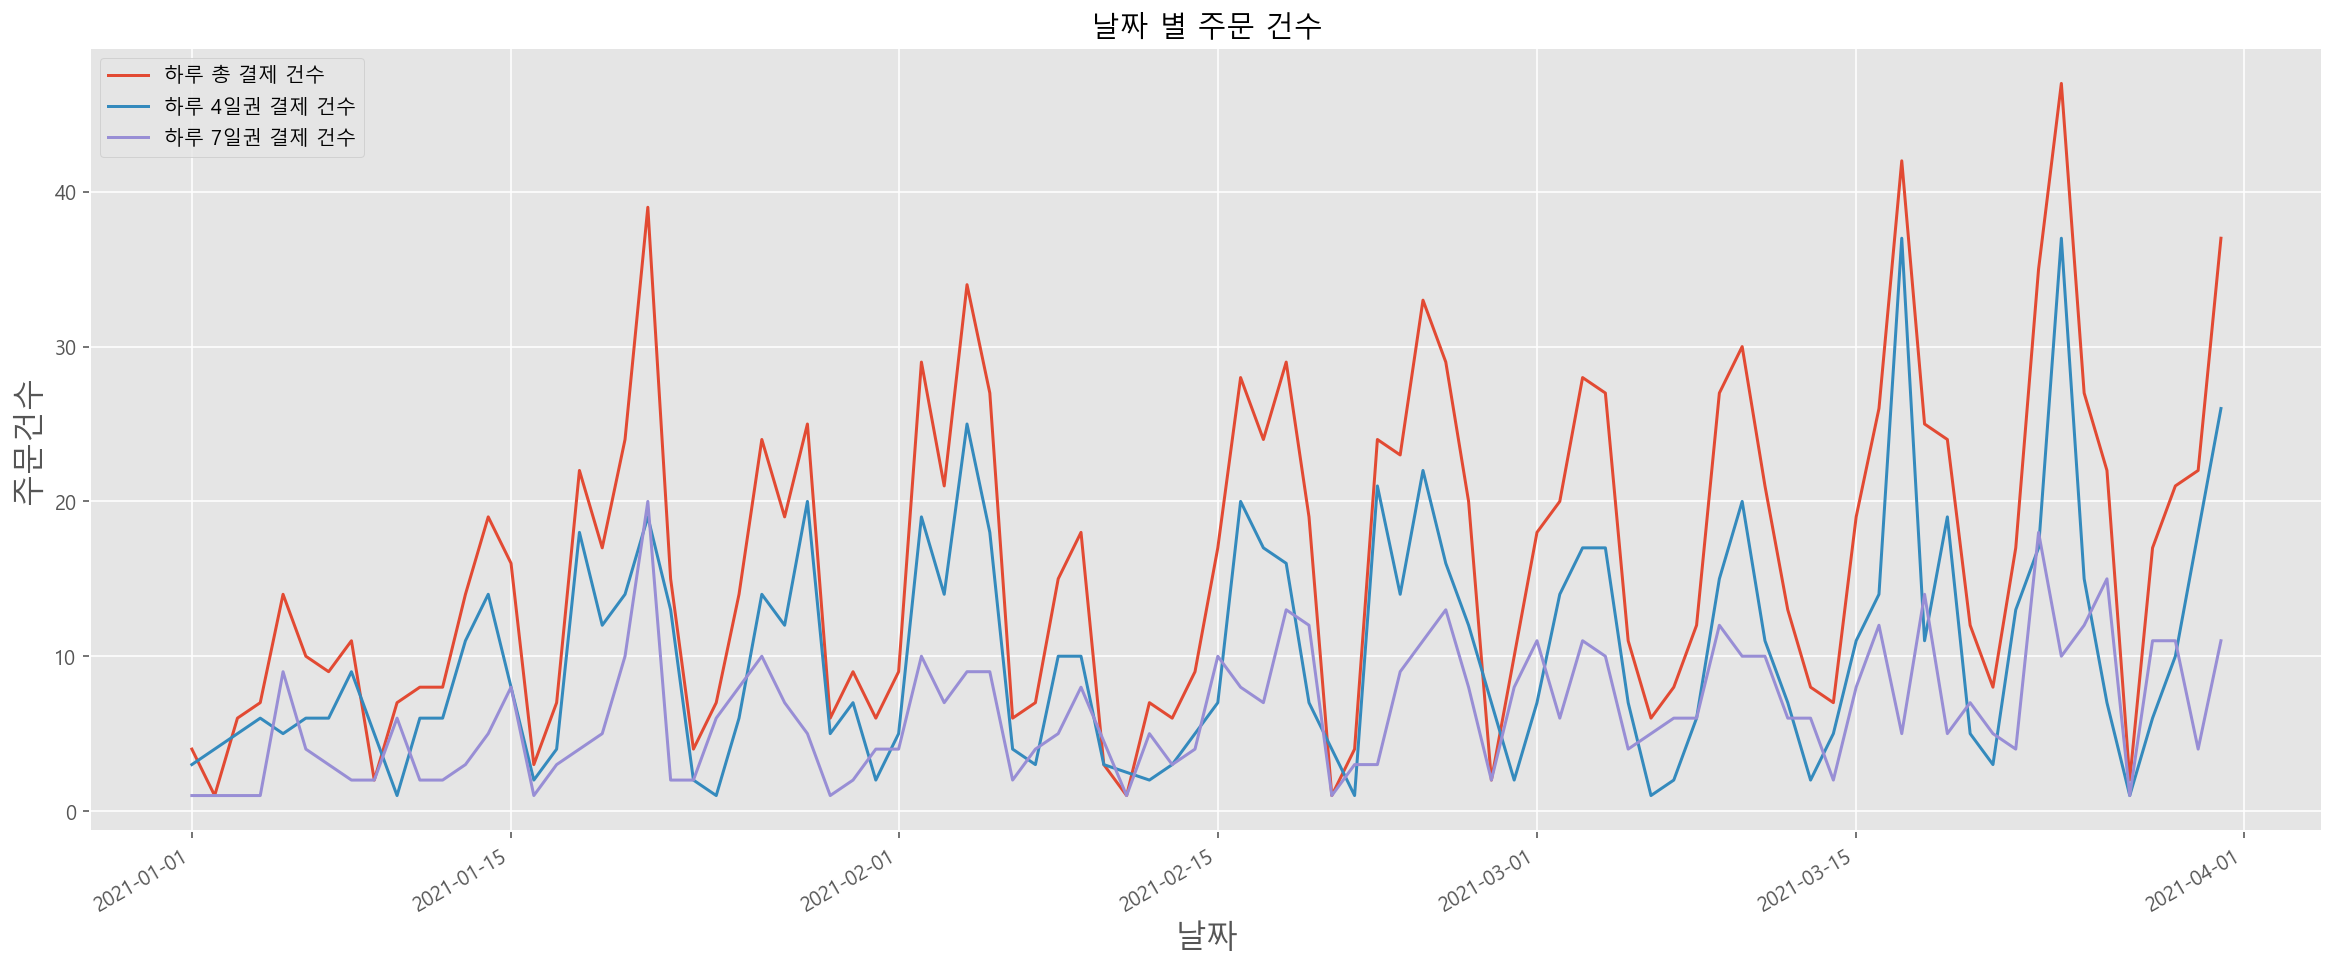

In [18]:
plt.figure(figsize=(20,8))
df['order_date'].value_counts().plot(label='하루 총 결제 건수')
df.loc[df['p_type']=='4days','order_date'].value_counts().plot(label='하루 4일권 결제 건수')
df.loc[df['p_type']=='7days','order_date'].value_counts().plot(label='하루 7일권 결제 건수')
plt.legend()
plt.title('날짜 별 주문 건수')
plt.xlabel('날짜', fontsize=16)
plt.ylabel('주문건수', fontsize=16)
plt.show()

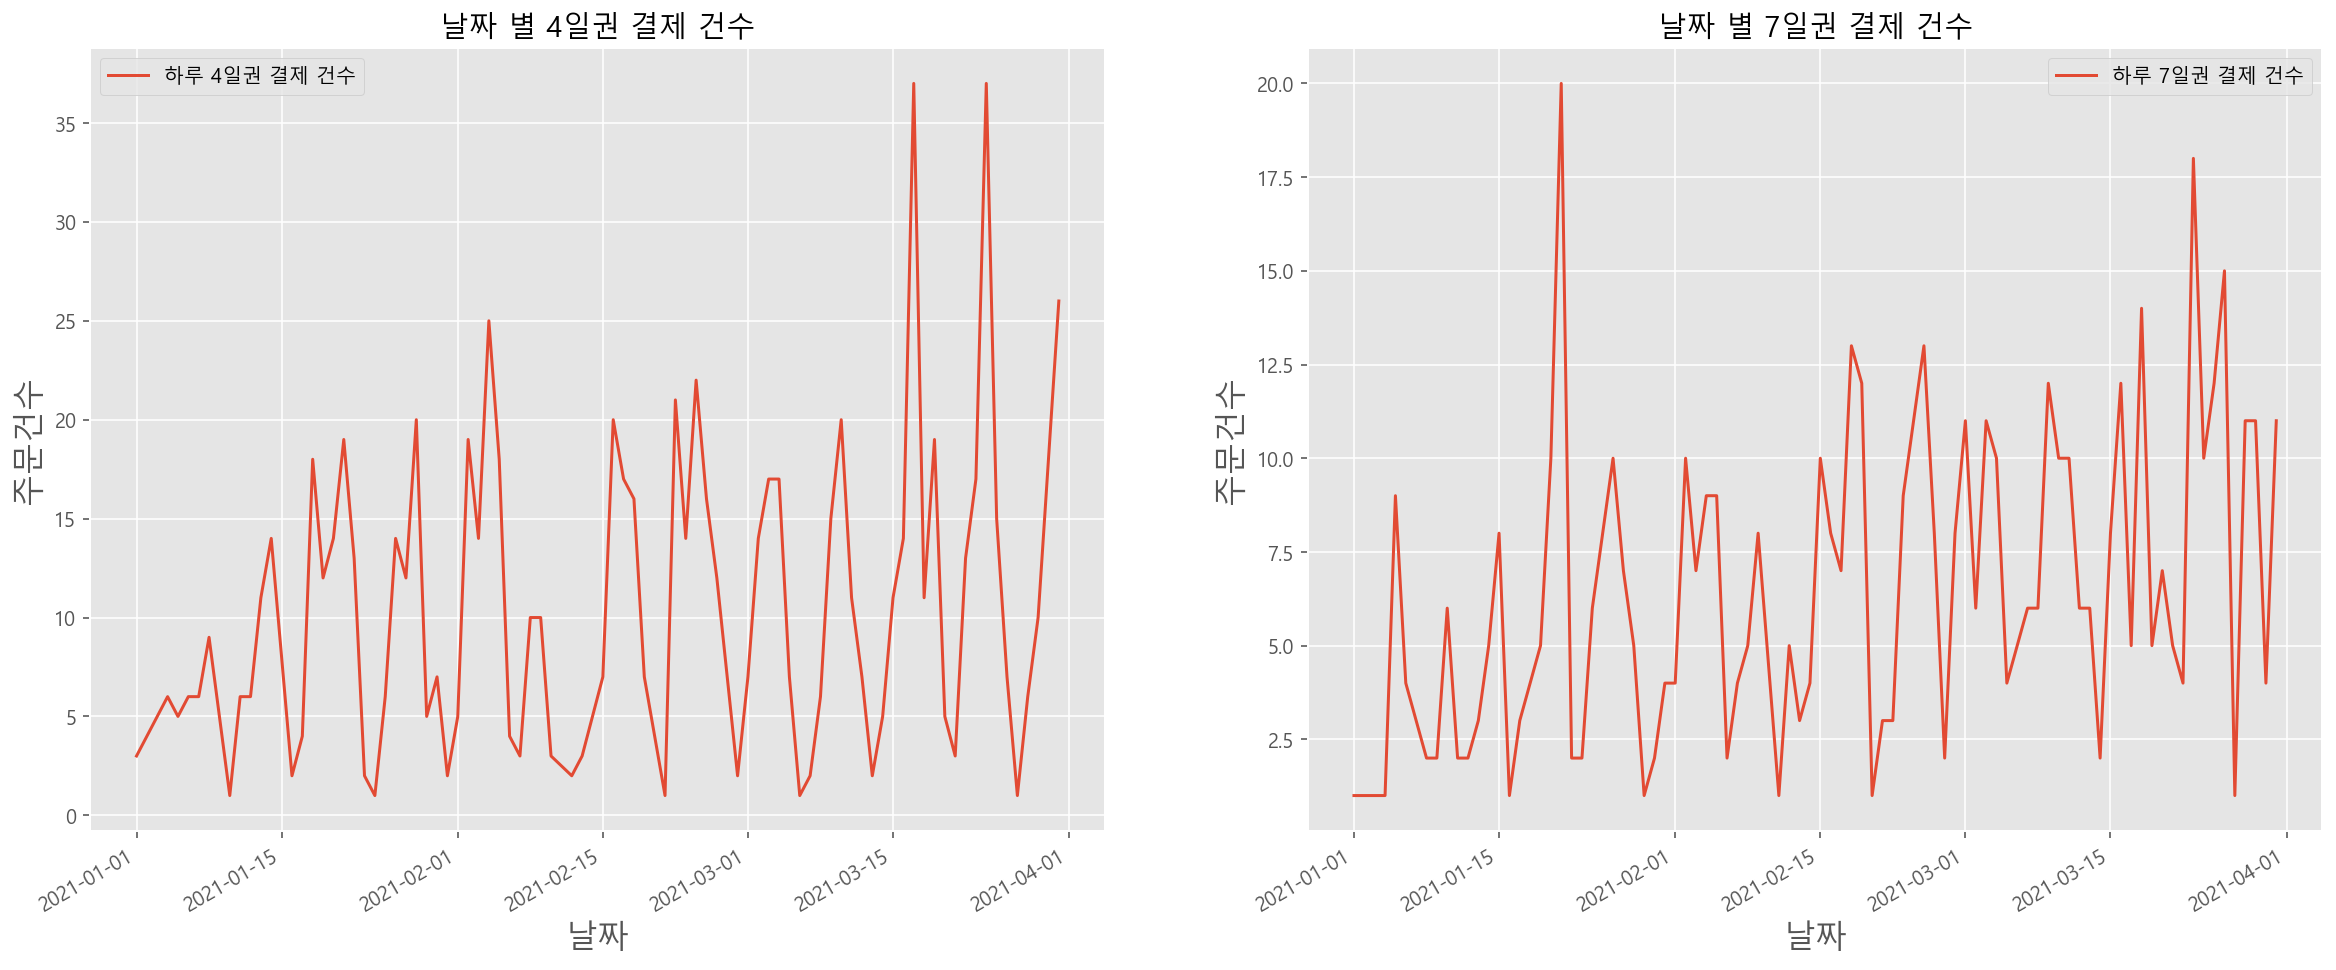

In [19]:
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)

df.loc[df['p_type']=='4days','order_date'].value_counts().plot(label='하루 4일권 결제 건수', ax=fig.add_subplot(gs[0,0]), title='날짜 별 4일권 결제 건수')
plt.xlabel('날짜', fontsize=16)
plt.ylabel('주문건수', fontsize=16)
plt.legend()
fig.show()

df.loc[df['p_type']=='7days','order_date'].value_counts().plot(label='하루 7일권 결제 건수', ax=fig.add_subplot(gs[0,1]),title='날짜 별 7일권 결제 건수')
plt.xlabel('날짜', fontsize=16)
plt.ylabel('주문건수', fontsize=16)
plt.legend()
fig.show()

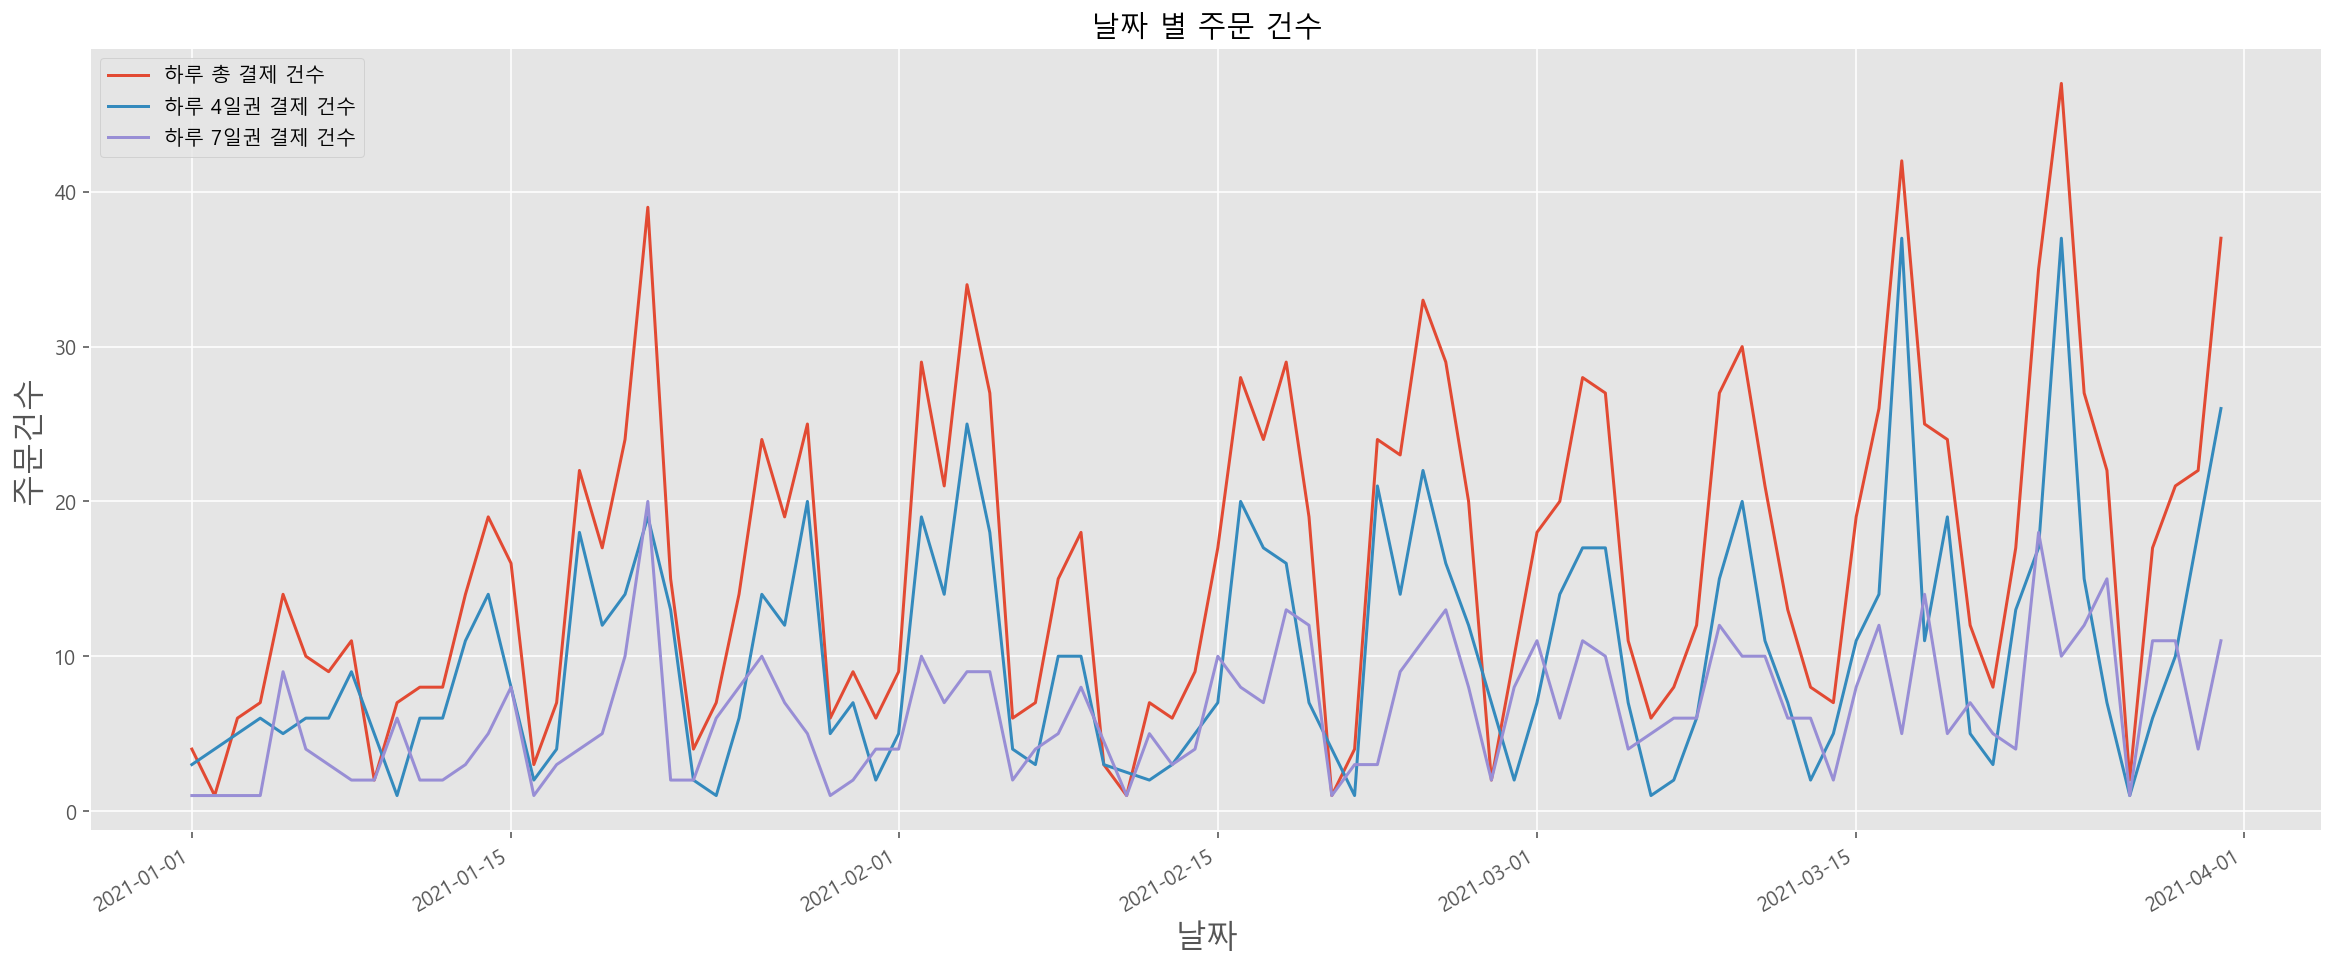

In [20]:
plt.figure(figsize=(20,8))
df['order_date'].value_counts().plot(label='하루 총 결제 건수')
df.loc[df['p_type']=='4days','order_date'].value_counts().plot(label='하루 4일권 결제 건수')
df.loc[df['p_type']=='7days','order_date'].value_counts().plot(label='하루 7일권 결제 건수')
plt.legend()
plt.title('날짜 별 주문 건수')
plt.xlabel('날짜', fontsize=16)
plt.ylabel('주문건수', fontsize=16)
plt.show()

## 유저별 사용회수

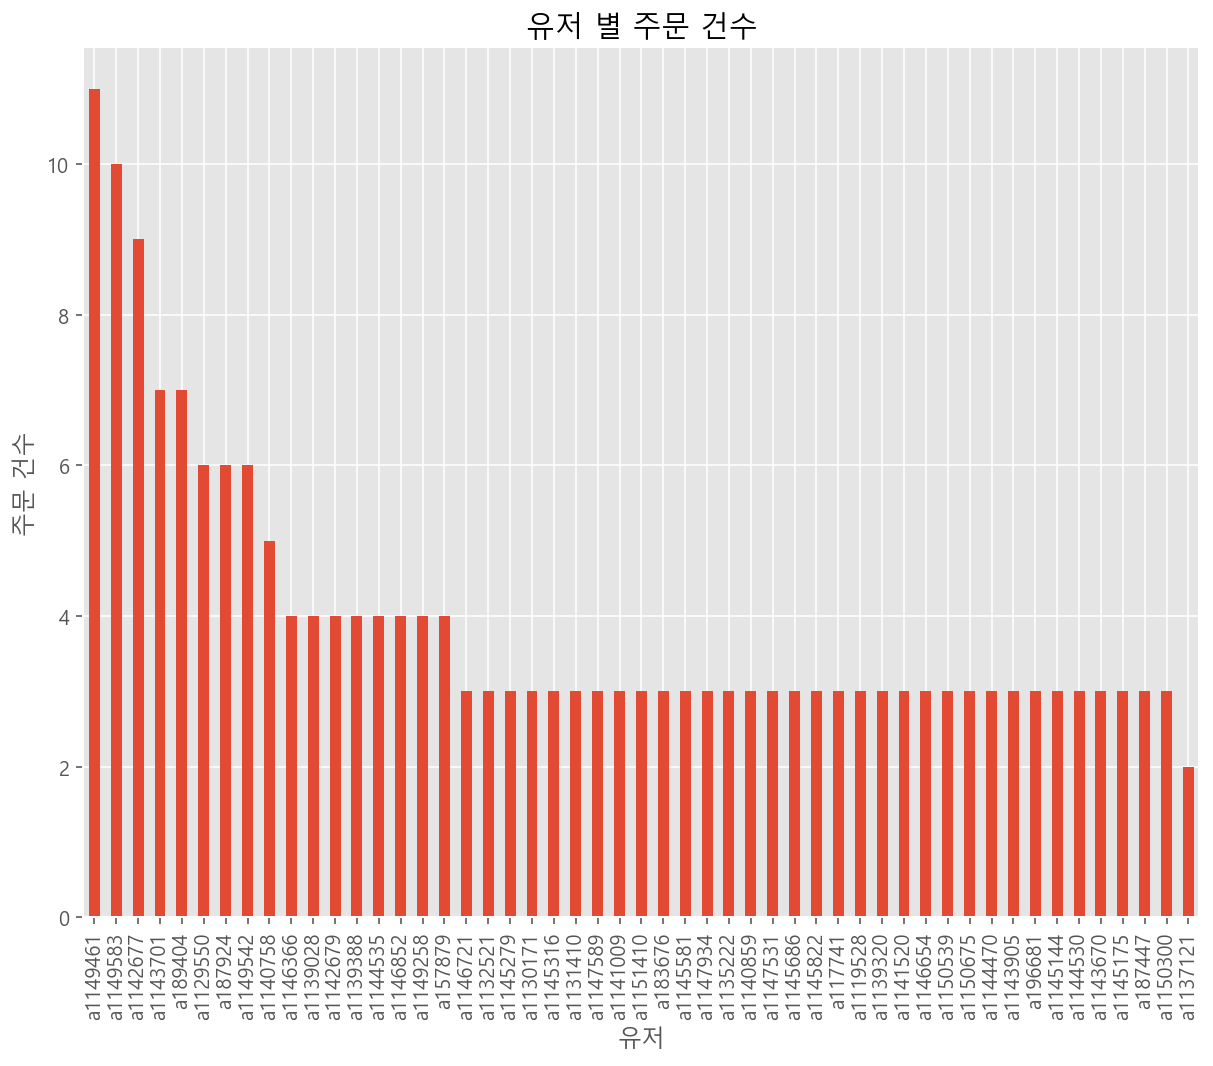

In [21]:
fig = plt.figure(figsize=(10,8))
df.groupby('USER').count().sort_values('goodsnm', ascending=False)['goodsnm'][:51].plot.bar(title='유저 별 주문 건수')
plt.xlabel('유저')
plt.ylabel('주문 건수')
plt.show()

## 상품별 주문횟수 : 236개가 2회 의상

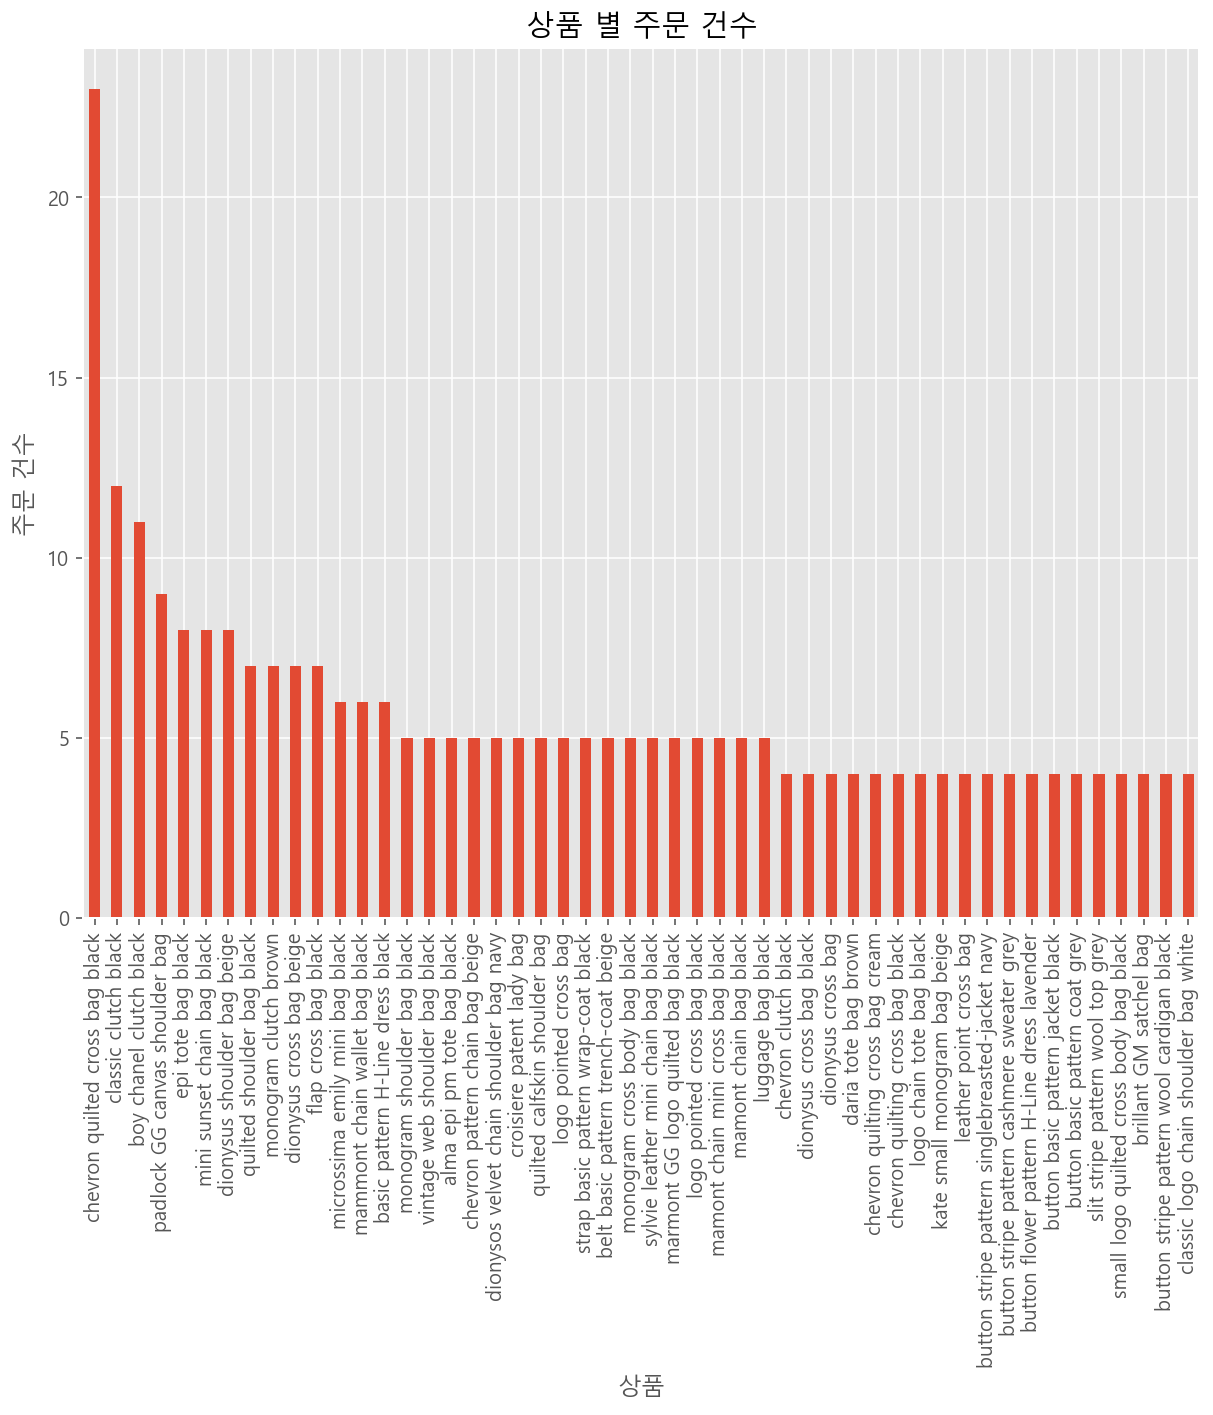

In [22]:
fig = plt.figure(figsize=(10,8))
df.groupby('goodsnm').count().sort_values('USER', ascending=False)['USER'][:50].plot.bar(title='상품 별 주문 건수')
plt.xlabel('상품')
plt.ylabel('주문 건수')
plt.show()

## 이용자 별 상품 대여 날짜 하루에? 여러번에?

In [23]:
df_tmp = df.groupby(['USER', 'order_date']).count().sort_values('brandnm',ascending=False)
display(df_tmp)
print(len(df_tmp.index), len(set([a for a,b in df_tmp.index])))

,,brandnm,goodsnm,reg_date,p_type,sub_type,app_yn
USER,order_date,,,,,,
a1149461,2021-03-17,11,11,11,11,11,0
a1149583,2021-03-19,10,10,10,10,10,0
a1142677,2021-01-18,9,9,9,9,9,9
a189404,2021-03-24,7,7,7,7,7,7
a1143701,2021-01-22,7,7,7,7,7,7
...,...,...,...,...,...,...,...
a1134915,2021-01-19,0,1,1,1,1,0
a1149885,2021-03-30,0,1,1,1,1,1
a110947,2021-03-29,0,1,1,1,1,1


1234 1234


* 여러개 주문한 사람은 하루에 다 주문

In [24]:
df[df['USER']=='a1142677']

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
357,Vivienne Westwood,basic pattern t-shirts lavender,a1142677,2021-01-13,2021-01-18,4days,T,Y
358,Greedilous,graphics pattern t-shirts yellow,a1142677,2021-01-13,2021-01-18,4days,T,Y
359,System homme,pocket stripe pattern shirts pink,a1142677,2021-01-13,2021-01-18,4days,T,Y
360,Covernat,button check pattern shirts mustard,a1142677,2021-01-13,2021-01-18,4days,T,Y
361,Musinsa standard,button basic pattern shirts deeppink,a1142677,2021-01-13,2021-01-18,4days,T,Y
362,Musinsa standard,button basic pattern polo-shirts beige,a1142677,2021-01-13,2021-01-18,4days,T,Y
363,Lafudge Store,pocket basic pattern top beige,a1142677,2021-01-13,2021-01-18,4days,T,Y
364,Calvin Klein,pocket basic pattern wool slacks grey,a1142677,2021-01-13,2021-01-18,4days,B,Y
365,Massimo Dutti,pocket basic pattern shirts mint,a1142677,2021-01-13,2021-01-18,4days,T,Y


## USER ID 확인 : user_id 와 reg_date는 크게 상관관계가 있음

In [25]:
print(sum(df['USER'].str[:1]=='a'), df['USER'].shape[0])
print('모든 USER는 a로 시작한다.')

1471 1471
모든 USER는 a로 시작한다.


In [26]:
df['reg_num'] = df['reg_date'].dt.year * 10**4 +df['reg_date'].dt.month * 10**2 +df['reg_date'].dt.day
df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,reg_num
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,20191206.0
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN,20210102.0
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN,20210102.0
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN,20210102.0
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,20210101.0
...,...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,20190410.0
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,20210211.0
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,20210228.0
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y,20210228.0


In [27]:
df['user_num'] = df['USER'].str[1:].astype('int')
df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,reg_num,user_num
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,20191206.0,161237
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN,20210102.0,1140859
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN,20210102.0,1140859
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN,20210102.0,1140859
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,20210101.0,1140740
...,...,...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,20190410.0,119721
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,20210211.0,1146069
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,20210228.0,1147848
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y,20210228.0,1147788


In [28]:
df[['user_num', 'reg_num']].corr()

,user_num,reg_num
user_num,1.00000,0.81746
reg_num,0.81746,1.00000


## APP 사용 현황

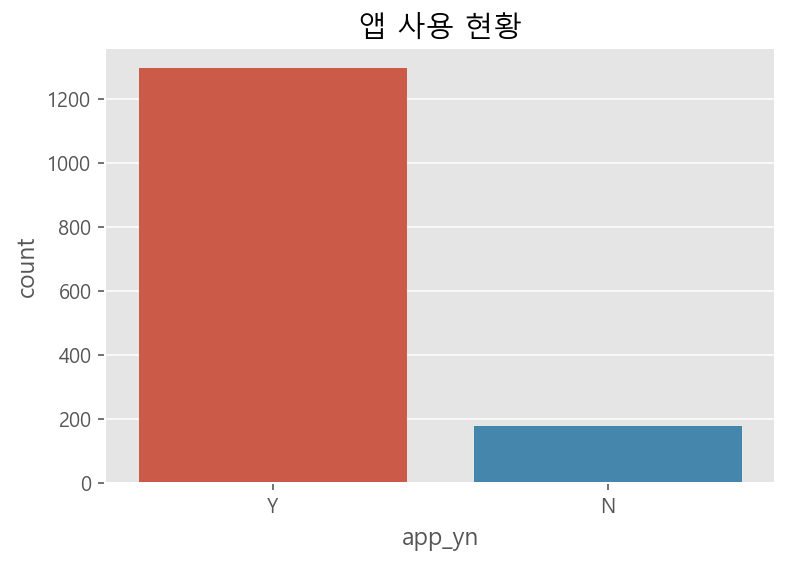

In [32]:
df['app_yn'] = df['app_yn'].fillna('N')
sns.countplot(data=df, x='app_yn')
plt.title('앱 사용 현황')
plt.show()

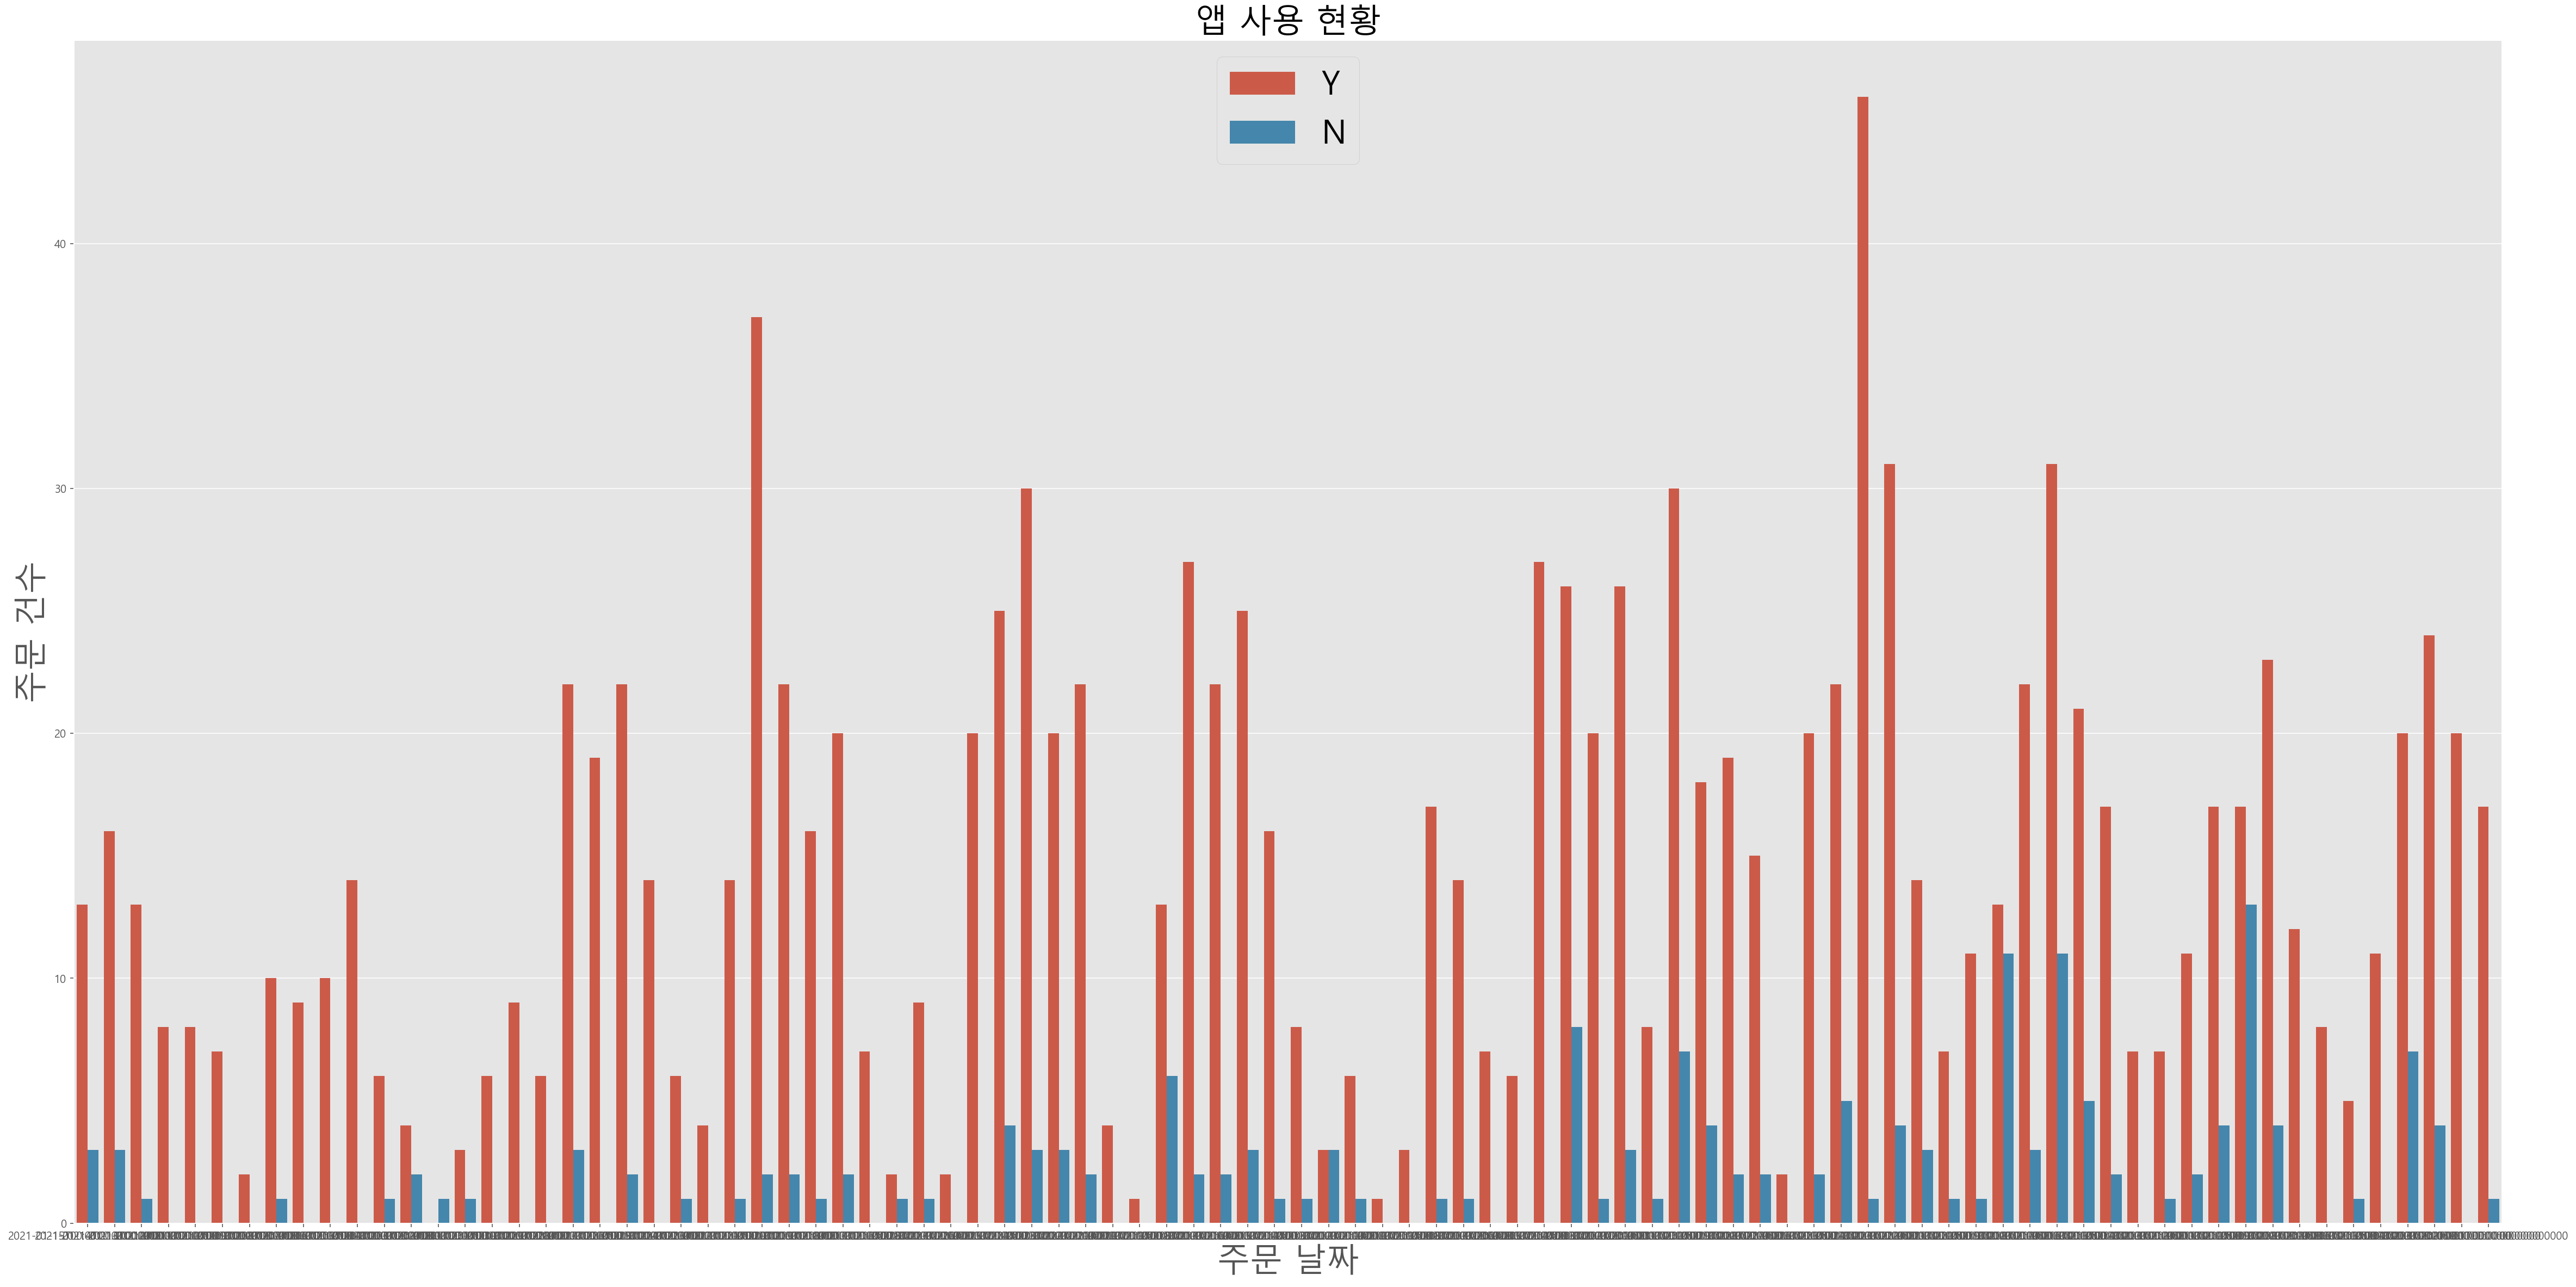

In [64]:
df['app_yn'] = df['app_yn'].fillna('N')
plt.figure(figsize=(40,20))
sns.countplot(data=df, x='order_date', hue='app_yn')
plt.title('앱 사용 현황', fontsize=30)
plt.legend(fontsize=30)
plt.xlabel('주문 날짜',fontsize=30)
plt.ylabel('주문 건수',fontsize=30)
plt.show()

## 선호 브랜드 : 명품에 집중되어 있음

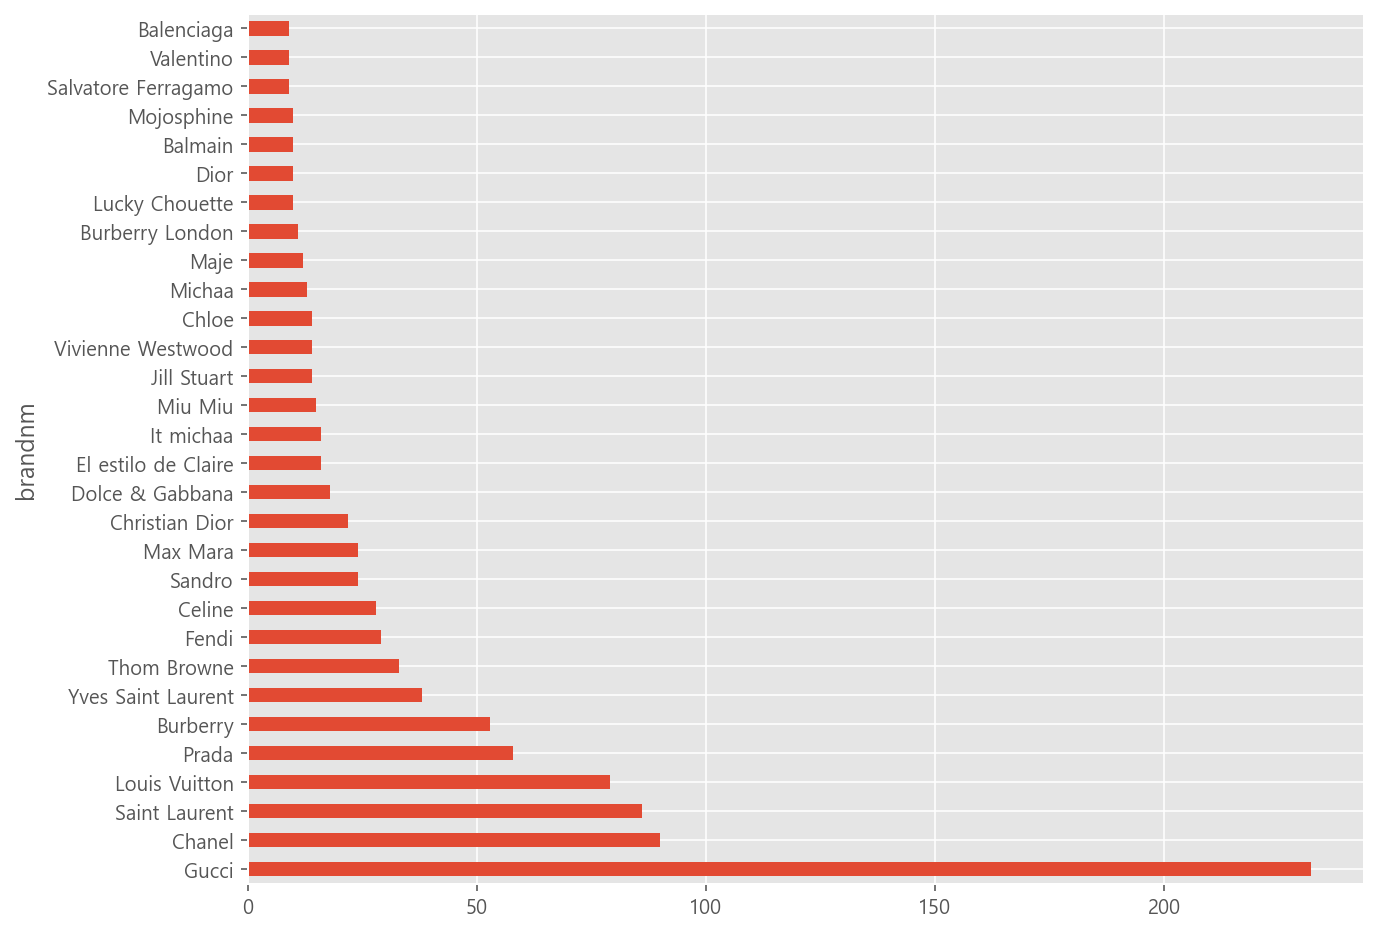

In [46]:
plt.figure(figsize=(10,8))
df.groupby('brandnm').count().sort_values('goodsnm', ascending=False)['goodsnm'][:30].plot.barh()
plt.show()

In [74]:
df['USER'].unique().shape

(1234,)

In [85]:
# df_gucci = df[df['brandnm']=='Gucci']
# df_gucci.groupby(['reg_date']).count()['goodsnm']#.sort_values('goodsnm', ascending=False)
# pd.crosstab(df_gucci['reg_date'], df_gucci['USER'])

## 정리
* 투피스의 경우 두가지로 위 아래 브랜드가 달라 모두 브랜드명이 적혀있지 않다.
* 전체/제품 타입별 모두 4days를 더 선호한다.
* 대여 물품 제품타입 순위 : 가방 >> 아우터 >= 드레스 > 상의 >> 하의 > 투피스
    * \>> : 압도적으로 많음, \>= : 큰 차이 없음
* 날짜가 지나도 투피스의 대여수는 올라가지 않는다.
* oscillation이 심하지만 전반적인 주문 건수는 올라가고 있다.
* 하지만 이렇게 대여 oscillation이 심한 이유는 무엇일까?
    * 인기제품이 이미 대여
    * 충성고객들이 이미 원하는 제품들을 대여중(하지만 여기서 충성고객들은 하루에 전부 대여를 하기 때문에 이러한 이유일 확률을 적음)
* 1234명 중 2건 이상 대여한 고객은 236명 : 약 19.125%
* 한명이 여러개를 대여할 경우 하루에 대여한 기록밖에 없음
* user_id 와 reg_date는 상당한 상관관계가 존재 (상관계수 : 0.81746)
* 앱 사용현황 : 사이트보다 앱 사용현황이 압도적으로 높지만 두가지 다 증가하고 있다.
* 선호 브랜드의 경우 명품에 집중되어 있음. 브랜드를 category로 나눠줄 필요성이 있어 보임